# Student Information
Name: Abner Tellez Sazo

Student ID: 106065434

---

### Instructions

- Download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read what the dataset is about on the link provided before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation techniques learned in the [first lab session](https://goo.gl/Sg4FS1) on the new dataset. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 80% of your grade!


- After you have completed the operations, you should attempt the **bonus exercises** provided in the [notebook](https://goo.gl/Sg4FS1) we used for the first lab session. There are six (6) additional exercises; attempt them all, as it is part of your grade (10%). 


- You are also expected to tidy up your notebook and attempt new data operations that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade.


- After completing all the above tasks, you are free to remove this header block and submit your assignment following the guide provided in the `README.md` file of the assignment's [repository](https://github.com/omarsar/data_mining_hw_1). 

In [1]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
import plotly.plotly as py
import plotly.graph_objs as go
import math
%matplotlib inline

# TA helpers
import helpers.data_mining_helpers as dmh
import helpers.text_analysis as ta

# My helpers
import helpers.csv_constructor as cc

#URL Data set
DATA_SET_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip"


# 1. Data source and 2. data preparation

In [3]:
# Load and prepare data directly the dataset URL
cc.download_zip(DATA_SET_URL) 

Extracting files...
Creating csv...
Done!


In [4]:
# Negative = 0, Positive = 1
categories = [0,1]

# 3. Converting dataset into Pandas dataframe

In [5]:
# Obtain the data trail using csv file in "dataset" folder
X = pd.read_csv("dataset/dataset.csv",delimiter="|")

In [6]:
# Show data_train and data_train size
print(X)

            Source                                           Sentence  Score
0     amazon_cells  So there is no way for me to plug it in here i...      0
1     amazon_cells                        Good case, Excellent value.      1
2     amazon_cells                             Great for the jawbone.      1
3     amazon_cells  Tied to charger for conversations lasting more...      0
4     amazon_cells                                  The mic is great.      1
5     amazon_cells  I have to jiggle the plug to get it to line up...      0
6     amazon_cells  If you have several dozen or several hundred c...      0
7     amazon_cells        If you are Razr owner...you must have this!      1
8     amazon_cells                Needless to say, I wasted my money.      0
9     amazon_cells                   What a waste of money and time!.      0
10    amazon_cells                    And the sound quality is great.      1
11    amazon_cells  He was very impressed when going from the orig...      1

In [7]:
# Print first 10 rows in data train
X[0:10]

,Source,Sentence,Score
0,amazon_cells,So there is no way for me to plug it in here i...,0
1,amazon_cells,"Good case, Excellent value.",1
2,amazon_cells,Great for the jawbone.,1
3,amazon_cells,Tied to charger for conversations lasting more...,0
4,amazon_cells,The mic is great.,1
5,amazon_cells,I have to jiggle the plug to get it to line up...,0
6,amazon_cells,If you have several dozen or several hundred c...,0
7,amazon_cells,If you are Razr owner...you must have this!,1
8,amazon_cells,"Needless to say, I wasted my money.",0
9,amazon_cells,What a waste of money and time!.,0


In [8]:
len(X)

3000

### 3.1 Trying some queries 

In [9]:
# First 10 only source and score
X[0:10][["Source", "Score"]]

,Source,Score
0,amazon_cells,0
1,amazon_cells,1
2,amazon_cells,1
3,amazon_cells,0
4,amazon_cells,1
5,amazon_cells,0
6,amazon_cells,0
7,amazon_cells,1
8,amazon_cells,0
9,amazon_cells,0


In [10]:
# Last 10 all information
X[-11:-1]

,Source,Sentence,Score
2989,yelp,I would avoid this place if you are staying in...,0
2990,yelp,The refried beans that came with my meal were ...,0
2991,yelp,Spend your money and time some place else.,0
2992,yelp,A lady at the table next to us found a live gr...,0
2993,yelp,the presentation of the food was awful.,0
2994,yelp,I can't tell you how disappointed I was.,0
2995,yelp,I think food should have flavor and texture an...,0
2996,yelp,Appetite instantly gone.,0
2997,yelp,Overall I was not impressed and would not go b...,0
2998,yelp,"The whole experience was underwhelming, and I ...",0


In [11]:
# 30 lines in intervals of 100
X.iloc[::100, :][0:30]

,Source,Sentence,Score
0,amazon_cells,So there is no way for me to plug it in here i...,0
100,amazon_cells,Integrated seamlessly with the Motorola RAZR p...,1
200,amazon_cells,The color is even prettier than I thought it w...,1
300,amazon_cells,Sending it back.,0
400,amazon_cells,what a disappointment,0
500,amazon_cells,"The bose noise cancelling is amazing, which is...",1
600,amazon_cells,Their Research and Development division obviou...,1
700,amazon_cells,"Also, the phone doesn't seem to accept anythin...",0
800,amazon_cells,"Good , works fine.",1
900,amazon_cells,"This was utterly confusing at first, which cau...",0


<hr>

# Exercise 0: 

Experiment with other querying techniques using pandas dataframes. Refer to the their documentation for more information.

In [12]:
# Only positive sentences
X[X["Score"]==1]

,Source,Sentence,Score
1,amazon_cells,"Good case, Excellent value.",1
2,amazon_cells,Great for the jawbone.,1
4,amazon_cells,The mic is great.,1
7,amazon_cells,If you are Razr owner...you must have this!,1
10,amazon_cells,And the sound quality is great.,1
11,amazon_cells,He was very impressed when going from the orig...,1
13,amazon_cells,Very good quality though,1
15,amazon_cells,Highly recommend for any one who has a blue to...,1
17,amazon_cells,So Far So Good!.,1
18,amazon_cells,Works great!.,1


In [13]:
# Count rows by source
X.groupby(['Source']).size()

Source
amazon_cells    1000
imdb            1000
yelp            1000
dtype: int64

In [14]:
# Name of columns
list(X.columns.values)

['Source', 'Sentence', 'Score']

In [15]:
# Obtain data types 
X.dtypes

Source      object
Sentence    object
Score        int64
dtype: object

In [16]:
# Obtain negative sentences from imdb and display only sentence
X.loc[(X["Source"]=="imdb")
         & (X["Score"]== 0) 
         , ["Sentence"]]

,Sentence
1000,"A very, very, very slow-moving, aimless movie ..."
1001,Not sure who was more lost - the flat characte...
1002,Attempting artiness with black & white and cle...
1003,Very little music or anything to speak of.
1005,"The rest of the movie lacks art, charm, meanin..."
1006,Wasted two hours.
1008,A bit predictable.
1015,It had some average acting from the main perso...
1025,This short film certainly pulls no punches.
1026,Graphics is far from the best part of the game.


In [17]:
# Obtain dataset order by sentence descending
X.sort_values(by=['Sentence'],ascending=False,inplace=False)

,Source,Sentence,Score
981,amazon_cells,you could only take 2 videos at a time and the...,0
2190,yelp,you can watch them preparing the delicious food!),1
381,amazon_cells,you can even take self portraits with the outs...,1
39,amazon_cells,worthless product.,0
764,amazon_cells,wont work right or atleast for me.,0
2692,yelp,will definitely be back!,1
400,amazon_cells,what a disappointment,0
2081,yelp,walked in and the place smelled like an old gr...,0
2259,yelp,very tough and very short on flavor!,0
2942,yelp,very slow at seating even with reservation.,0


<hr>

### 4.1 Missing Values

In [18]:
# Check if we have null values
X.isnull()

,Source,Sentence,Score
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [19]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

Source      (The amoung of missing records is: , 0)
Sentence    (The amoung of missing records is: , 0)
Score       (The amoung of missing records is: , 0)
dtype: object

In [20]:
# Better way to do :) 
X.isnull().sum()

Source      0
Sentence    0
Score       0
dtype: int64

**Add missing dummy data**

In [21]:
# Generate 300 rows of dummy data with missing values in our dataset
dummy_data = dmh.add_dummy_data({'Source': "dummy_site", 'Sentence': 'dummy_sentences', "Score" : 1}, 300, True)

In [22]:
dummy_data

[{'Score': 1, 'Source': 'dummy_site'},
 {'Sentence': 'dummy_sentences', 'Source': 'dummy_site'},
 {'Score': 1, 'Source': 'dummy_site'},
 {'Sentence': 'dummy_sentences', 'Source': 'dummy_site'},
 {'Score': 1, 'Sentence': 'dummy_sentences'},
 {'Score': 1, 'Source': 'dummy_site'},
 {'Score': 1, 'Sentence': 'dummy_sentences'},
 {'Score': 1, 'Sentence': 'dummy_sentences'},
 {'Sentence': 'dummy_sentences', 'Source': 'dummy_site'},
 {'Score': 1, 'Sentence': 'dummy_sentences'},
 {'Sentence': 'dummy_sentences', 'Source': 'dummy_site'},
 {'Sentence': 'dummy_sentences', 'Source': 'dummy_site'},
 {'Score': 1, 'Source': 'dummy_site'},
 {'Sentence': 'dummy_sentences', 'Source': 'dummy_site'},
 {'Score': 1, 'Source': 'dummy_site'},
 {'Sentence': 'dummy_sentences', 'Source': 'dummy_site'},
 {'Sentence': 'dummy_sentences', 'Source': 'dummy_site'},
 {'Score': 1, 'Sentence': 'dummy_sentences'},
 {'Score': 1, 'Source': 'dummy_site'},
 {'Score': 1, 'Source': 'dummy_site'},
 {'Score': 1, 'Sentence': 'dummy_

In [23]:
X = X.append(dummy_data,ignore_index=True)

In [24]:
# check if the records was commited into result
len(X)

3300

<hr>

# Exercise 1 

Code for how to calculate the missing values for every record instead of every column. Hint axis parameter. Check the documentation for more information.

In [25]:
X_missing = X # create a copy

In [26]:
X_missing['Missing_values'] = X_missing.isnull().sum(axis=1).tolist()

In [27]:
X_missing

,Source,Sentence,Score,Missing_values
0,amazon_cells,So there is no way for me to plug it in here i...,0.0,0
1,amazon_cells,"Good case, Excellent value.",1.0,0
2,amazon_cells,Great for the jawbone.,1.0,0
3,amazon_cells,Tied to charger for conversations lasting more...,0.0,0
4,amazon_cells,The mic is great.,1.0,0
5,amazon_cells,I have to jiggle the plug to get it to line up...,0.0,0
6,amazon_cells,If you have several dozen or several hundred c...,0.0,0
7,amazon_cells,If you are Razr owner...you must have this!,1.0,0
8,amazon_cells,"Needless to say, I wasted my money.",0.0,0
9,amazon_cells,What a waste of money and time!.,0.0,0


<hr>

In [28]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

Source            (The amoung of missing records is: , 100)
Sentence           (The amoung of missing records is: , 95)
Score             (The amoung of missing records is: , 105)
Missing_values      (The amoung of missing records is: , 0)
dtype: object

In [29]:
# Clear data of missing values
X.dropna(inplace=True)

In [30]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

Source            (The amoung of missing records is: , 0)
Sentence          (The amoung of missing records is: , 0)
Score             (The amoung of missing records is: , 0)
Missing_values    (The amoung of missing records is: , 0)
dtype: object

In [31]:
len(X)

3000

### 4.2 Check duplicate data

In [32]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2970    False
2971    False
2972    False
2973    False
2974    False
2975    False
2976    False
2977    False
2978    False
2979    False
2980    False
2981    False
2982    False
2983    False
2984    False
2985    False
2986    False
2987    False
2988    False
2989    False
2990    False
2991    False
2992    False
2993    False
2994    False
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [33]:
sum(X.duplicated())

17

In [34]:
# Show duplicates NEW QUERY :) 
X[X.duplicated(keep="first")]

,Source,Sentence,Score,Missing_values
285,amazon_cells,Great phone!.,1.0,0
407,amazon_cells,Works great.,1.0,0
524,amazon_cells,Works great!.,1.0,0
543,amazon_cells,Don't buy this product.,0.0,0
744,amazon_cells,If you like a loud buzzing to override all you...,0.0,0
748,amazon_cells,Does not fit.,0.0,0
778,amazon_cells,This is a great deal.,1.0,0
792,amazon_cells,Great Phone.,1.0,0
892,amazon_cells,Excellent product for the price.,1.0,0
896,amazon_cells,Great phone.,1.0,0


In [35]:
# Delete duplicates
X.drop_duplicates(keep="first", inplace=True)

In [36]:
sum(X.duplicated())

0

In [37]:
len(X)

2983

## 5. Data Processing

### 5.1 Sampling

In [38]:
X_sample = X.sample(n=1000)

In [39]:
len(X_sample)

1000

In [40]:
# 0 = Neagatives, 1 = Positives
categories

[0, 1]

In [41]:
X_category_counts = ta.get_tokens_and_frequency(list(X.Score))
X_sample_category_counts = ta.get_tokens_and_frequency(list(X_sample.Score))

In [42]:
py.iplot(ta.plot_word_frequency(X_category_counts, "Score distribution"))

In [43]:
py.iplot(ta.plot_word_frequency(X_sample_category_counts, "Sample score distribution"))

<hr>

## Other way to represent the data using bar graphs! :)

In [44]:
X_amz = X_sample.loc[X_sample['Source'] == 'amazon_cells']
X_category_amz_counts = ta.get_tokens_and_frequency(list(X_amz.Score))

X_imdb = X_sample.loc[X_sample['Source'] == 'imdb']
X_category_imdb_counts = ta.get_tokens_and_frequency(list(X_imdb.Score))

X_yelp = X_sample.loc[X_sample['Source'] == 'yelp']
X_category_yelp_counts = ta.get_tokens_and_frequency(list(X_yelp.Score))

trace1 = go.Bar(
    x= list(X_category_amz_counts[0]),
    y= list(X_category_amz_counts[1]),
    name='Amazon Cells'
)
trace2 = go.Bar(
    x= list(X_category_imdb_counts[0]),
    y= list(X_category_imdb_counts[1]),
    name='IMDB'
)
trace3 = go.Bar(
    x= list(X_category_yelp_counts[0]),
    y= list(X_category_yelp_counts[1]),
    name='Yelp!'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

<hr>

### 5.2 Feature Creation


In [45]:
# Create unigrams and drop stopwords
X['Unigrams'] = X['Sentence'].apply(lambda x: dmh.tokenize_text(x, True))

In [46]:
X[0:5]

,Source,Sentence,Score,Missing_values,Unigrams
0,amazon_cells,So there is no way for me to plug it in here i...,0.0,0,"[So, way, plug, US, unless, I, go, converter, .]"
1,amazon_cells,"Good case, Excellent value.",1.0,0,"[Good, case, ,, Excellent, value, .]"
2,amazon_cells,Great for the jawbone.,1.0,0,"[Great, jawbone, .]"
3,amazon_cells,Tied to charger for conversations lasting more...,0.0,0,"[Tied, charger, conversations, lasting, 45, mi..."
4,amazon_cells,The mic is great.,1.0,0,"[The, mic, great, .]"


In [47]:
list(X[0:5]['Unigrams'])

[['So', 'way', 'plug', 'US', 'unless', 'I', 'go', 'converter', '.'],
 ['Good', 'case', ',', 'Excellent', 'value', '.'],
 ['Great', 'jawbone', '.'],
 ['Tied',
  'charger',
  'conversations',
  'lasting',
  '45',
  'minutes.MAJOR',
  'PROBLEMS',
  '!',
  '!'],
 ['The', 'mic', 'great', '.']]

In [48]:
len(X)

2983

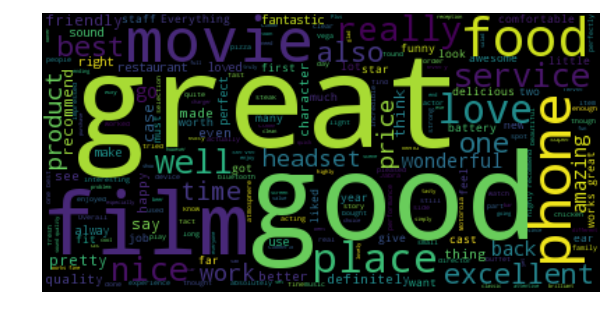

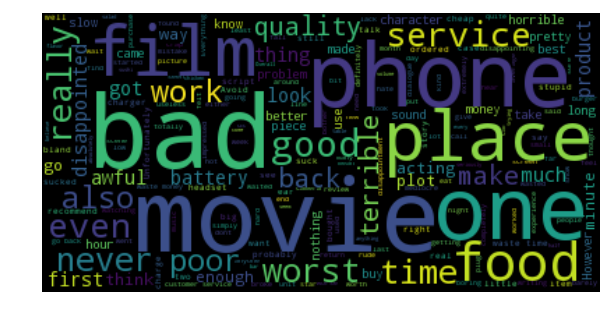

In [49]:
psentence = X['Unigrams'][X['Score'] == 1]
nsentence = X['Unigrams'][X['Score'] == 0]

ta.plot_word_cloud(psentence.to_string())
ta.plot_word_cloud(nsentence.to_string())

### 5.3 Feature subset selection

In [50]:
# New vectorizer Data Set
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.Sentence)

In [51]:
analyze = count_vect.build_analyzer()
analyze(" ".join(list(X[4:5].Sentence)))

['the', 'mic', 'is', 'great']

In [52]:
# Ceck the shape of this matrix:
X_counts.shape

(2983, 5155)

In [53]:
X[0:10]

,Source,Sentence,Score,Missing_values,Unigrams
0,amazon_cells,So there is no way for me to plug it in here i...,0.0,0,"[So, way, plug, US, unless, I, go, converter, .]"
1,amazon_cells,"Good case, Excellent value.",1.0,0,"[Good, case, ,, Excellent, value, .]"
2,amazon_cells,Great for the jawbone.,1.0,0,"[Great, jawbone, .]"
3,amazon_cells,Tied to charger for conversations lasting more...,0.0,0,"[Tied, charger, conversations, lasting, 45, mi..."
4,amazon_cells,The mic is great.,1.0,0,"[The, mic, great, .]"
5,amazon_cells,I have to jiggle the plug to get it to line up...,0.0,0,"[I, jiggle, plug, get, line, right, get, decen..."
6,amazon_cells,If you have several dozen or several hundred c...,0.0,0,"[If, several, dozen, several, hundred, contact..."
7,amazon_cells,If you are Razr owner...you must have this!,1.0,0,"[If, Razr, owner, ..., must, !]"
8,amazon_cells,"Needless to say, I wasted my money.",0.0,0,"[Needless, say, ,, I, wasted, money, .]"
9,amazon_cells,What a waste of money and time!.,0.0,0,"[What, waste, money, time, !, .]"


In [54]:
X_counts[0:10].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [55]:

plot_x_100 = ["term_"+str(i) for i in count_vect.get_feature_names()[0:100]]

In [56]:
len(plot_x)

NameError: name 'plot_x' is not defined

In [ ]:
plot_y_100 = ["doc_"+ str(i) for i in list(X.index)[0:100]]

In [ ]:
len(plot_y)

In [ ]:
plot_z_100 = X_counts[0:100, 0:100].toarray()

In [ ]:
# plot using only 100 docs and 100 terms
py.iplot(ta.plot_heat_map(plot_x_100, plot_y_100, plot_z_100))

### Plot the entire sample

In [ ]:
# New vectorizer Data Set
count_sample_vect = CountVectorizer()
X_sample_counts = count_sample_vect.fit_transform(X_sample.Sentence)

In [ ]:
X_sample_counts.shape

In [ ]:
X_sample_counts[0:10].toarray()

In [ ]:
plot_x = ["term_"+str(i) for i in count_sample_vect.get_feature_names()]
plot_y = ["doc_"+ str(i) for i in list(X_sample.index)]

In [ ]:
len(plot_x)

In [ ]:
len(plot_y)

In [ ]:
plot_z = X_sample_counts[0:1000, 0:2682].toarray()

In [ ]:
# to plot using the entire sample term-document matrix
py.iplot(ta.plot_heat_map(plot_x, plot_y, plot_z))

## 5.4 Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X_reduced = PCA(n_components=3).fit_transform(X_counts.toarray())

In [ ]:
X_reduced.shape

In [ ]:
trace1 = ta.get_trace(X_reduced, X["Score"], 1.0, "rgb(71,233,163)") # Positive sentences
trace2 = ta.get_trace(X_reduced, X["Score"], 0.0, "rgb(52,133,252)") # Negativ sentences

In [ ]:
data = [trace1, trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

## 5.5 Atrribute Transformation / Aggregation

In [ ]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [ ]:
term_frequencies[0]

In [ ]:
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

In [ ]:
term_frequencies_log = [math.log(i) for i in term_frequencies]

In [ ]:
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies_log], "Term Frequency Distribution"))

## 5.6 Discretization and Binarization

In [ ]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [ ]:
mlb = preprocessing.LabelBinarizer()

In [ ]:
mlb.fit(X.Score)

In [ ]:
mlb.classes_

In [ ]:
X['bin_category'] = mlb.transform(X['Score']).tolist()

In [ ]:
X[0:9]